# Realised variance Alpha Capital predictive model for Range-based financial assets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('cba_log_rv.sqlite')

query = '''SELECT l.date, l.log_rv, r.rng_lag1, r.rng_avg5, rng_avg22, rng_avg253, rng_up FROM
rng_feature r
JOIN log_rv l   
on r.date = l.date;
 '''
range_variance = pd.read_sql(query, conn)


In order to develop the predictive model for the risk of daily stock returns of the Commonwealth Bank of Australia(CBA), it is necessary to determine the predictivity of CBA features regarding the future realised variance (transformed as log RV) of CBA at least one-day-ahead. The purpose of this EDA vignette is therefore to explore whether the Range-based features are able to be adopted as a component of prediction model. 

To analyse the range of intra-daily returns and the log realised variance of financial asset, we perform a query to break up intra-daily ranges of CBA by different periods including ranges on previous trading day, average ranges over the previous 22 trading days and the average range over previous 253 trading days.

## Statistics & Comparison between 22-day and 253-day model

It is expected that our inspection on log rv and ranges of CBA will bring us the answers to the following concerns. 

*1) In which timeframe does the intra-daily return of CBA have the highest and lowest average range? 

*2) During the given historical trading periods from 2003 to 2021, which period of CBA intra-daily returns has a higher average intra-daily range in most of the trading days, the previous 22 trading day or the previous 253 days?  

We briefly inspect means of intra-daily ranges of CBA over periods in four different lengths. Furthermore, we have also compared the days of  indicates the following observed results: 

1) The intra-daily return of CBA has the highest mean average range over the previous 253 trading days and the lowest over the previous 22 trading days.   

2) During the period from 7th Jan 2003 to 20th Aug 2021, the intra-daily return of CBA over the past 22 trading days has higher average ranges than that over the past 253 trading days in 1912 trading days, and has lower average ranges in the other 2787 trading days, which is not surprising as the mean average range of CBA return over the 253 trading days is higher than it over the 22 trading days.   

In [2]:
print('Mean range of intra-daily returns of CBA of the previous trading day: ${:.4f}'.format(range_variance['rng_lag1'].mean()))
print('Mean average range of intra-daily returns of CBA over the previous 5 trading days: ${:.4f}'.format(range_variance['rng_avg5'].mean()))
print('Mean average range of intra-daily returns of CBA over the previous 22 trading days: ${:.4f}'.format(range_variance['rng_avg22'].mean()))
print('Mean average range of intra-daily returns of CBA over the previous 253 trading days: ${:.4f}'.format(range_variance['rng_avg253'].mean()))
print(range_variance['rng_up'].value_counts())

Mean range of intra-daily returns of CBA of the previous trading day: $0.6835
Mean average range of intra-daily returns of CBA over the previous 5 trading days: $0.6834
Mean average range of intra-daily returns of CBA over the previous 22 trading days: $0.6832
Mean average range of intra-daily returns of CBA over the previous 253 trading days: $0.6863
0    2787
1    1912
Name: rng_up, dtype: int64


## Correlational Analysis

*Is realised return of CBA correlated with ranges/average ranges of CBA returns?* 

In order to answer this question, we calculate the covariance between log realised variance of CBA and average ranges of intra-daily returns of CBA during the different time frames. Additionally, we construct a scatter plot *Range of intra-daily returns VS Log Realised Variance* and a heatmap *Correlations between log rv and average CBA return ranges*. The discovered results are the following: 

1) The overall trend illustrates a positive correlation between ranges of average intra-daily return and log realised variances, which means that a larger range of average intra-daily return brings a larger log realised variance of CBA. The reason is that all covariance calculated are positive and the trend of scatter plot approves the calculation. 

2) As for the timeframes, it is exhibited that the average range of CBA return over the past 22 trading days is the mostly correlated variable with log realised variance of CBA (with the greatest covariance 0.658). The range of CBA return on the previous trading day is the least correlated variable with covariance of 0.389, and the correlation is so weak that we even plot a separated version of scatter plot to exclude it. The heatmap approves the calculations of covariance as the zones with high correlation are shown in light green and otherwise in dark green. 


In [3]:
print(range_variance.corr()['log_rv'].sort_values(ascending=False))

log_rv        1.000000
rng_avg22     0.657851
rng_avg5      0.585659
rng_avg253    0.520267
rng_lag1      0.389231
rng_up        0.305492
Name: log_rv, dtype: float64


In [4]:
y1 = range_variance['log_rv']
x1 = range_variance['rng_lag1']
y2 = range_variance['log_rv']
x2 = range_variance['rng_avg5']
y3 = range_variance['log_rv']
x3 = range_variance['rng_avg22']
y4 = range_variance['log_rv']
x4 = range_variance['rng_avg253']


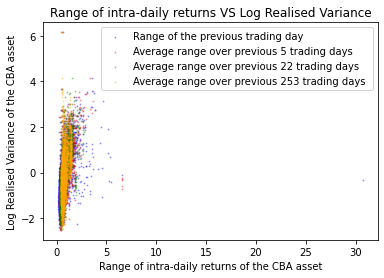

In [5]:
plt.scatter(x1, y1, s = 1, c = 'blue',alpha = 0.3, label = 'Range of the previous trading day')
plt.scatter(x2, y2, s = 1, c = 'red',alpha = 0.3, label = 'Average range over previous 5 trading days ')
plt.scatter(x3, y3, s = 1, c = 'green',alpha = 0.3, label = 'Average range over previous 22 trading days ')
plt.scatter(x4, y4, s = 1, c = 'orange', alpha = 0.3, label = 'Average range over previous 253 trading days ')

plt.xlabel('Range of intra-daily returns of the CBA asset')
plt.ylabel('Log Realised Variance of the CBA asset')
plt.title('Range of intra-daily returns VS Log Realised Variance')
plt.legend()
plt.savefig('plot.png')

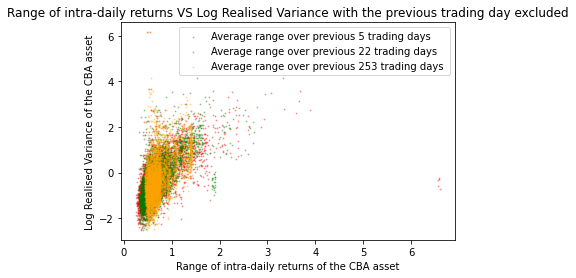

In [6]:
plt.scatter(x2, y2, s = 1, c = 'red',alpha = 0.3, label = 'Average range over previous 5 trading days ')
plt.scatter(x3, y3, s = 1, c = 'green',alpha = 0.3, label = 'Average range over previous 22 trading days ')
plt.scatter(x4, y4, s = 1, c = 'orange', alpha = 0.3, label = 'Average range over previous 253 trading days ')

plt.xlabel('Range of intra-daily returns of the CBA asset')
plt.ylabel('Log Realised Variance of the CBA asset')
plt.title('Range of intra-daily returns VS Log Realised Variance with the previous trading day excluded')
plt.legend()
plt.savefig('plot_rnglag1excluded.png')

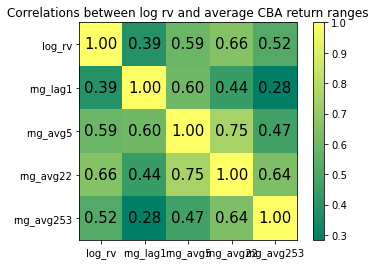

In [7]:
corl = range_variance[['log_rv', 'rng_lag1', 'rng_avg5', 'rng_avg22', 'rng_avg253']].corr()
n_var = len(corl)
plt.imshow(corl, cmap = 'summer')
plt.xticks(range(n_var), corl.columns)
plt.yticks(range(n_var), corl.columns)

for i in range(n_var):
    for j in range(n_var):
        plt.text(i, j, '{:.2f}'.format(corl.iloc[i, j]), ha="center", va="center", color="k", fontsize = 15)


plt.colorbar()

plt.title('Correlations between log rv and average CBA return ranges')
plt.savefig('correlation.png')

## Annual Models can bring difference and shortcomings: take FY 2016-2021 as an example

Recall the crucial correlational analysis, it is discovered that if we take the data from 1st July 2016 to 30th June 2021, the average range of CBA return over the past 5 trading days is the mostly correlated variable with log realised variance of CBA (with the greatest covariance 0.692), while the range of CBA return over the previous 22 trading day becomes the least correlated variable with covariance of 0.618. 

The findings above remind that the length of timeframe selection can bring a different conclusion on the range model selection.  

In [8]:
query_2021 = '''SELECT l.date, l.log_rv, r.rng_lag1, r.rng_avg5, rng_avg22, rng_avg253, rng_up FROM
rng_feature r
JOIN log_rv l   
on r.date = l.date
Where l.date BETWEEN "2016-07-01" AND "2021-06-30" '''

range_variance_2021 = pd.read_sql(query_2021, conn)

print(range_variance_2021.corr()['log_rv'].sort_values(ascending=False))

log_rv        1.000000
rng_avg5      0.692364
rng_lag1      0.649211
rng_avg22     0.617971
rng_up        0.334788
rng_avg253    0.260538
Name: log_rv, dtype: float64


## Summary of our observations & our shortcomings of analysis 

The analysis on realised variance of CBA and average ranges of intra-daily returns of CBA over various timeframes illustrates that the log realised variance of CBA is mostly correlated with average ranges of CBA return over the past 22 trading days, and therefore average ranges of return. 

However, the conclusion might be changed as if we take a shorter timeline, for example, a five-year or a ten-year timeline, the log realised variance of CBA might be mostly correlated to another average range variable. Considering that we have teammates working on other features including log realised variance feature and quantile range features, it is necessary for all team members to concern the timeframe of data selection when each choosing the best model for every feature.  

